In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [2]:
for dirpath,dirname,filenames in os.walk("Rice_Image_Dataset"):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There are 3 directories and 0 images in Rice_Image_Dataset
There are 5 directories and 0 images in Rice_Image_Dataset\Test
There are 0 directories and 1500 images in Rice_Image_Dataset\Test\Arborio
There are 0 directories and 1500 images in Rice_Image_Dataset\Test\Basmati
There are 0 directories and 1500 images in Rice_Image_Dataset\Test\Ipsala
There are 0 directories and 1500 images in Rice_Image_Dataset\Test\Jasmine
There are 0 directories and 1500 images in Rice_Image_Dataset\Test\Karacadag
There are 5 directories and 0 images in Rice_Image_Dataset\Training
There are 0 directories and 12000 images in Rice_Image_Dataset\Training\Arborio
There are 0 directories and 12000 images in Rice_Image_Dataset\Training\Basmati
There are 0 directories and 12000 images in Rice_Image_Dataset\Training\Ipsala
There are 0 directories and 12000 images in Rice_Image_Dataset\Training\Jasmine
There are 0 directories and 12000 images in Rice_Image_Dataset\Training\Karacadag
There are 5 directories and 0 im

In [3]:
#Setup Training,Test and Validation directories
train_dir="./Rice_Image_Dataset/Training/"
test_dir="./Rice_Image_Dataset/Test/"
val_dir="./Rice_Image_Dataset/Validation/"

In [4]:
#Let's get the class names
import pathlib
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*') ]))
class_names

array(['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'],
      dtype='<U9')

In [5]:
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    
    random_image=random.sample(os.listdir(target_folder),1)
    
    img=mpimg.imread(target_folder+"/"+random_image[0])
    
    plt.imshow(img)
    
    plt.axis('off')
    
    plt.title(target_class)
    
    print(f"Image Shape:{img.shape}")

Image Shape:(250, 250, 3)


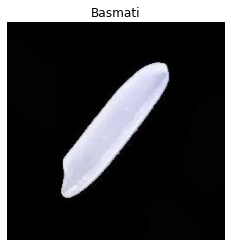

In [6]:
import random
img=view_random_image(target_dir=train_dir,
                     target_class=random.choice(class_names))


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescale
train_datagen=ImageDataGenerator(rescale=1/255.)
valid_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
#Load data
train_data=train_datagen.flow_from_directory(train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                             class_mode='categorical')
valid_data=valid_datagen.flow_from_directory(val_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          class_mode='categorical')
test_data=test_datagen.flow_from_directory(val_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          class_mode='categorical')


Found 60000 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


In [8]:
#Creating the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,3,input_shape=(224,224,3),activation="relu",padding="same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,3,activation="relu",padding="same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5,activation="softmax")
])

#Compile the model
model.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
               metrics=['accuracy'])


In [9]:
#Creating early stopping callback
callback = tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss',restore_best_weights=True)

#Fit the model
history=model.fit(train_data,
                     epochs=50,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data),
                 callbacks=[callback])

Epoch 1/50
1875/1875 [==============================] - 76s 38ms/step - loss: 0.5783 - accuracy: 0.7813 - val_loss: 0.8853 - val_accuracy: 0.7928
Epoch 2/50
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1216 - accuracy: 0.9627 - val_loss: 0.8864 - val_accuracy: 0.8032
Epoch 3/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0744 - accuracy: 0.9762 - val_loss: 0.6476 - val_accuracy: 0.8384
Epoch 4/50
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0496 - accuracy: 0.9838 - val_loss: 0.3771 - val_accuracy: 0.8980
Epoch 5/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0363 - accuracy: 0.9882 - val_loss: 0.2812 - val_accuracy: 0.9125
Epoch 6/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.2115 - val_accuracy: 0.9296
Epoch 7/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.1435 -

In [13]:
def plot_loss_curves(history):
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']
    epochs=range(len(history.history['loss']))
    #Plot loss
    plt.plot(epochs,loss,label="Training loss")
    plt.plot(epochs,val_loss,label="Validation loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()
    
    #Plot accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="Training accuracy")
    plt.plot(epochs,val_accuracy,label="Validation accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

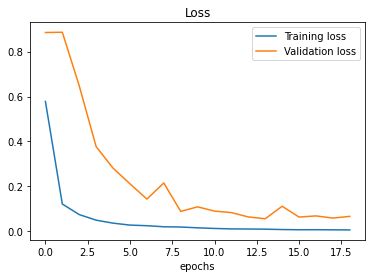

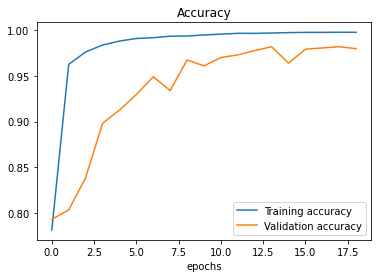

In [14]:
plot_loss_curves(history)

In [15]:
model.evaluate(test_data)

235/235 [==============================] - 7s 30ms/step - loss: 0.0559 - accuracy: 0.9820


[0.055861297994852066, 0.9819999933242798]